<a href="https://colab.research.google.com/github/tahamsi/computer-vision/blob/main/week-6/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  [![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/tahamsi/computer-vision)

##Logistic Regression
*is* a machine learning model used for binary classification problems, where the goal is to predict one of two possible outcomes (e.g., yes/no, true/false, 0/1). Unlike linear regression, which predicts continuous values, logistic regression predicts probabilities that the output belongs to a particular class. It has the same components as linear regression, but with the addition of a nonlinear transfer function, typically the sigmoid function.

 **Sigmoid Function**:

 Logistic regression uses the sigmoid function (an S-shaped curve) to map predicted values to probabilities between 0 and 1. The formula for the sigmoid function is:

$ Sigmoid(z) = \frac{1}{1 + e ^{-z}}$

The output of the sigmoid function is a probability. If the output is greater than 0.5, the model classifies the instance as one class (usually 1), and if it’s less than 0.5, it classifies it as the other class (usually 0).

**Mathematical Formula:**

Here is the mathematical formula of logistic regression:

$p(y =1 \mid  x) = \sigma( \sum_{i=1}^d w_i × x_i + b)$

Where:

* $y$ is the dependent variable,
* $x$ is/are the independent variable(s),
* $b$ is the intercept,
* $w$ is/are the coefficient(s) (slope of the line),
* $p(y =1 \mid  x) \in (0 , 1)$ represents the probability of y being 1, given the independent variables,
* $\sigma$ is a sigmoid function.

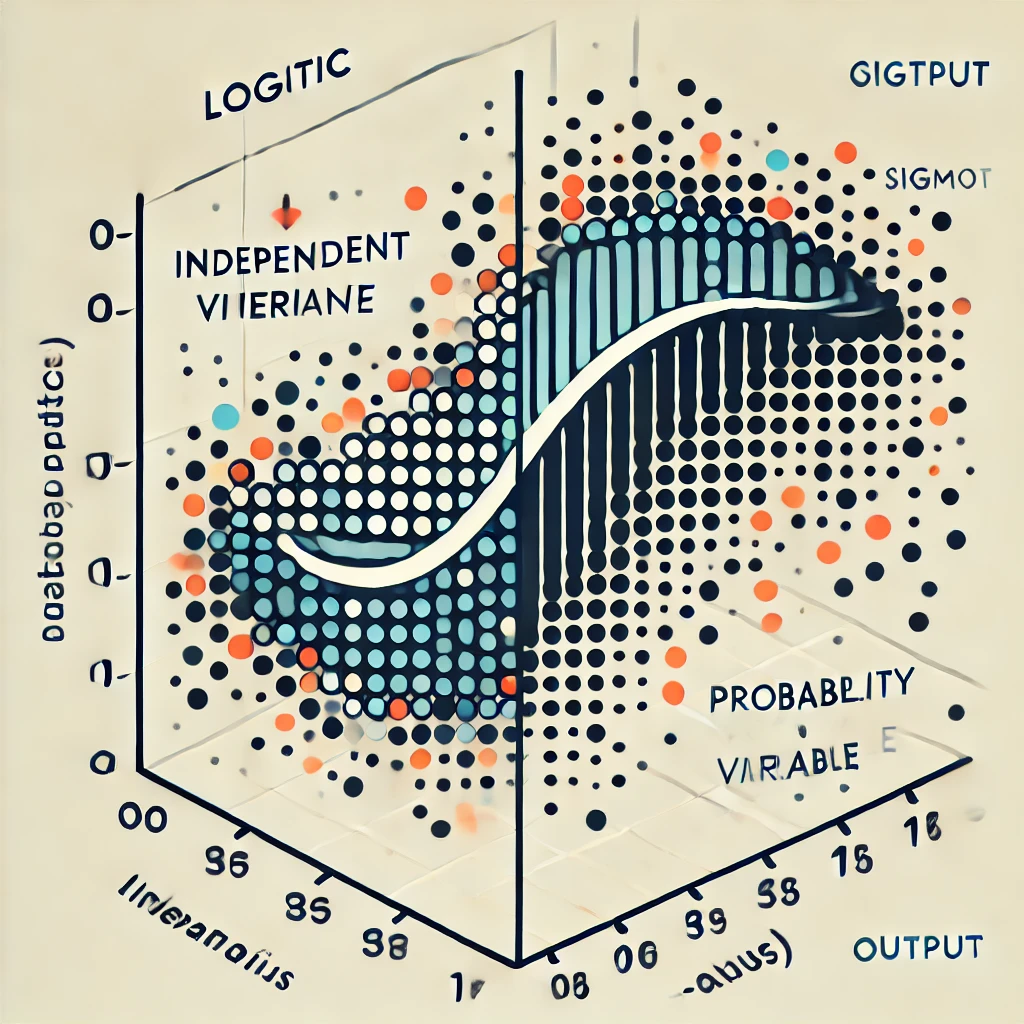

# Prepare the environment

**TensorFlow** is an open-source machine learning framework developed by the Google Brain team. It is widely used for various machine learning and deep learning tasks. **TensorFlow** is particularly popular for deep learning applications, such as image and speech recognition, natural language processing, and generative models.

*Make sure that TensorFlow is installed on your notebook.*

*If you are running this notebook in Google Colab, navigate to Edit -> Notebook settings -> Hardware accelerator, set it to GPU, and then click Save. This will ensure your notebook uses a GPU, which will significantly speed up model training times.*

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Sun Oct 13 12:09:12 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [10]:
# import libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.preprocessing import StandardScaler

##Use case

The dataset contains environmental sensor readings collected from IoT devices in a smart home. The aim is to predict whether the temperature condition in the home is abnormal (binary classification: 1 for "yes," 0 for "no") based on four sensor readings:

* Humidity (%): The percentage of humidity in the environment. High humidity levels can influence temperature abnormalities, especially in enclosed spaces.
* Temperature (°C): The current temperature in degrees Celsius. This feature is directly related to the "Abnormal Temp" target.
* CO2 Level (ppm): The concentration of carbon dioxide in parts per million. CO2 levels may indicate human activity or ventilation problems, which could cause abnormal temperature conditions.
* Light Intensity (lux): The level of ambient light in lux, indicating the presence of daylight or artificial lighting. It could correlate with heating or cooling systems' activity.

**Target variable**:

* Abnormal Temp (1 = Yes, 0 = No): A binary outcome, where "1" indicates an abnormal temperature condition, and "0" represents normal temperature.

**Description**

In a smart home or building management scenario, IoT sensors are deployed to monitor environmental conditions. The objective is to predict whether the current temperature is abnormal based on other sensor readings (humidity, CO2 level, light intensity).

*Logistic regression* is suitable for this use case because it predicts binary outcomes (abnormal temperature or not). A trained logistic regression model could provide home automation systems with real-time alerts or trigger actions like adjusting heating/cooling systems or improving ventilation if abnormal conditions are detected.

This prediction helps optimize energy use, maintain comfort, and prevent environmental problems in smart homes.

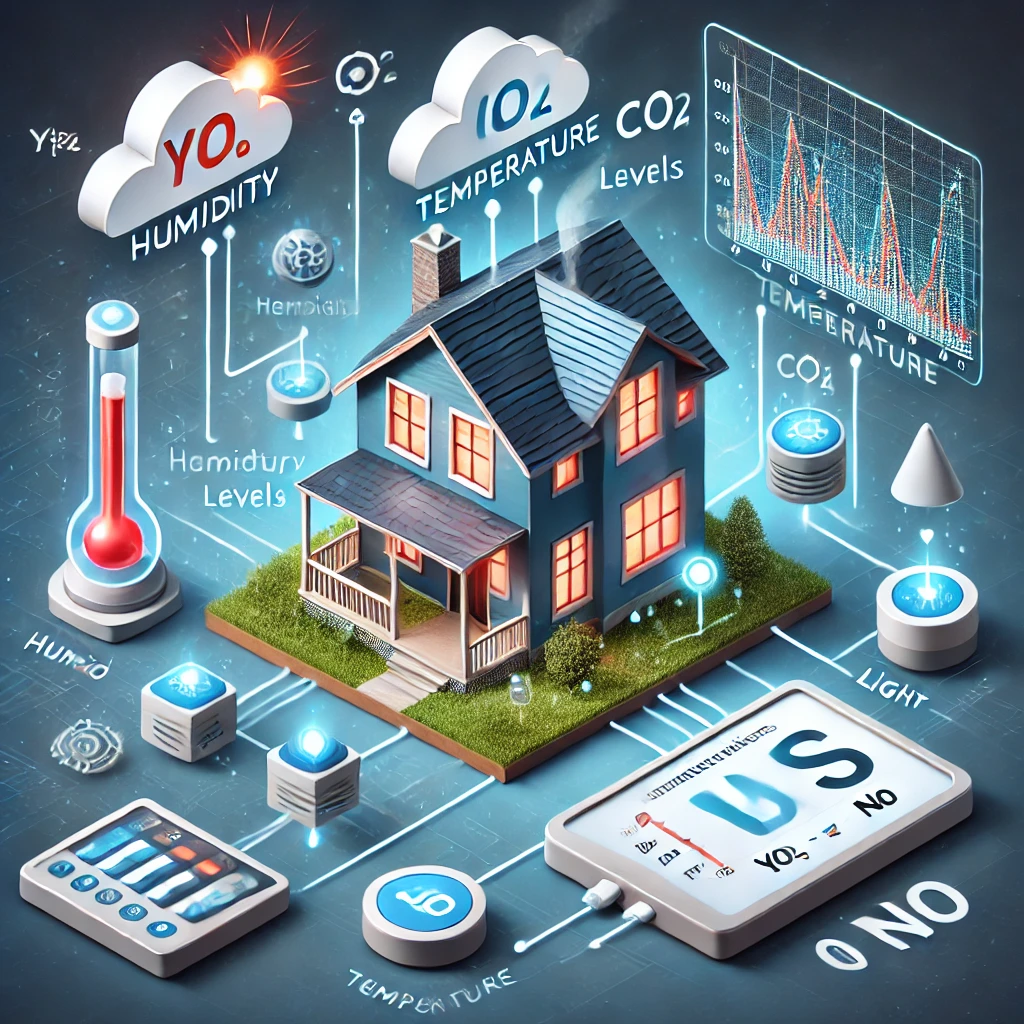

In [11]:
# Upload the file
# URL of the raw CSV file on GitHub
url =  'https://github.com/tahamsi/computer-vision/blob/main/week-6/smart_home_classification.csv?raw=true'
# Read the CSV into a pandas DataFrame
data = pd.read_csv(url)
data.head()

,Humidity (%),Temperature (°C),CO2 Level (ppm),Light Intensity (lux),"Abnormal Temp (1 = Yes, 0 = No)"
0,68,26,529,291,1
1,58,18,619,170,1
2,44,29,453,197,0
3,72,25,742,297,0
4,37,28,623,397,1


from matplotlib import pyplot as plt
_df_28['Humidity (%)'].plot(kind='hist', bins=20, title='Humidity (%)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_29['Temperature (°C)'].plot(kind='hist', bins=20, title='Temperature (°C)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_30['CO2 Level (ppm)'].plot(kind='hist', bins=20, title='CO2 Level (ppm)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_31['Light Intensity (lux)'].plot(kind='hist', bins=20, title='Light Intensity (lux)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_32.plot(kind='scatter', x='Humidity (%)', y='Temperature (°C)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_33.plot(kind='scatter', x='Temperature (°C)', y='CO2 Level (ppm)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_34.plot(kind='scatter', x='CO2 Level (ppm)', y='Light Intensity (lux)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_35.plot(kind='scatter', x='Light Intensity (lux)', y='Abnormal Temp (1 = Yes, 0 = No)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_36['Humidity (%)'].plot(kind='line', figsize=(8, 4), title='Humidity (%)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_37['Temperature (°C)'].plot(kind='line', figsize=(8, 4), title='Temperature (°C)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_38['CO2 Level (ppm)'].plot(kind='line', figsize=(8, 4), title='CO2 Level (ppm)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_39['Light Intensity (lux)'].plot(kind='line', figsize=(8, 4), title='Light Intensity (lux)')
plt.gca().spines[['top', 'right']].set_visible(False)

In [12]:
# Defining dependent and independent variables -- there are 4 independent variables and one dependent.
data = data.to_numpy()
X = data[:,:4]
Y = data[:,4]
# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

##Define a Logistic Regression Model

You can use the same API as for a neural network; the output here is sigmoid.

For futher information check [Functional API](https://www.tensorflow.org/api_docs/python/tf/keras/Model?_gl=1*1jhprjy*_up*MQ..*_ga*NTQ3NDYzMzA2LjE3Mjg2Nzk0Njg.*_ga_W0YLR4190T*MTcyODY3OTQ2OC4xLjAuMTcyODY3OTY0Mi4wLjAuMA..)

In [14]:
# Define the model structure
inputs = Input(shape=(4,)) # Shape refers to the number of independent variables (features) in the dataset.
output = Dense(1, activation = 'sigmoid')(inputs)
model = Model(inputs=inputs, outputs=output)

**Compile** the model using the binary cross entropy error loss function, as it is appropriate for binary classification problems.

[**Binary Cross-Entropy** ](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy?_gl=1*lzmqos*_up*MQ..*_ga*NzkyMzM0ODE4LjE3Mjg4MjIyMTc.*_ga_W0YLR4190T*MTcyODgyMjIxNy4xLjAuMTcyODgyMjIxNy4wLjAuMA..) (also called log loss) is a loss function used in binary classification tasks to measure how well a classification model's predictions match the true labels. It is particularly used in models where the output is a probability, such as logistic regression or neural networks using the sigmoid function.

**Formula**:

$BCE_i = -[y_i×log(\hat{y}_i) + (1-y_i)×log(1-\hat{y}_i)]$

Where:
* $y_i$ is the actual label (0 or 1) for the $i$-th data point.
* $\hat{y}_i$ is the predicted probability that the label is 1 (output of the model, between 0 and 1) for the $i$-th data point.

**Explanation**:
* If the actual label is 1: The loss will be small when $\hat{y}$ is close to 1 (a confident, correct prediction), and it will be large if $\hat{y}$ is close to 0 (a poor prediction).

* If the actual label is 0: The loss will be small when $\hat{y}$ is close to 0, and large if $\hat{y}$ is close to 1.

**Purpose**:

Binary cross-entropy penalizes wrong predictions more heavily the further they are from the actual label. The goal is to minimize this loss, which pushes the model to make more accurate predictions. It is widely used in tasks like spam detection, fraud detection, or any problem with two possible outcomes (binary classification).


**Adam**

is an optimization algorithm; for more details, please refer to the following link.

https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam

In [17]:
model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [18]:
r = model.fit(X,Y, epochs = 100)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 150ms/step - accuracy: 0.5434 - loss: 0.7827
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5236 - loss: 0.8318
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5393 - loss: 0.8315 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5340 - loss: 0.8337 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5017 - loss: 0.8515 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4788 - loss: 0.8603 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5580 - loss: 0.8042 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5663 - loss: 0.7732 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5413 - loss: 0.7941 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5403 - loss: 0.7970 
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5361 - loss: 0.8198 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4903 - los

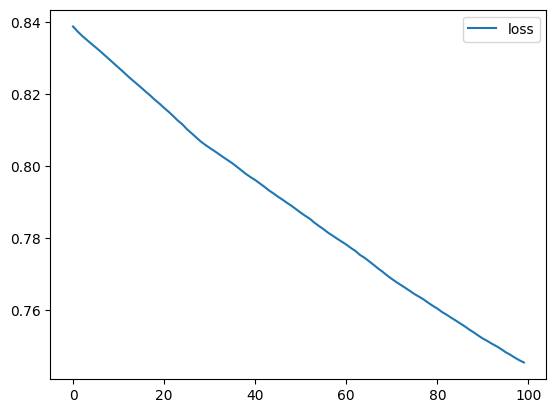

In [19]:
plt.plot(r.history['loss'], label = 'loss')
plt.legend()